<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana14/AlgoritmoMetropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import cm
from IPython.display import clear_output
import time
from tqdm import tqdm

In [2]:
def GetPlot():

    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    return ax,ax1

In [3]:
def Likelihood(x,p):
  mu,sigma = p
  return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))

In [31]:
def Metropolis(Likelihood, p, x0=0, a=1, NSteps=int(2e4), burned=1000):

  x = np.zeros(NSteps)
  x[0] = x0

  accept = 0

  for i in range(NSteps-1):

    # Donde estoy
    p0 = Likelihood(x[i],p)

    # Guess
    xn1 = x[i] + a*np.random.uniform(-1,1)

    p1 = Likelihood(xn1,p)

    alpha = np.minimum(1, p1/p0)

    g = np.random.rand()

    if g < alpha:
      x[i+1] = xn1
      accept += 1
    else:
      x[i+1] = x[i]

    if i % 200 == 0:
     # print(p1,p0)
      clear_output(wait=True)
      ax,ax1 = GetPlot()
      ax.plot(x[:i+1],'-',color='k')

      _x = np.linspace(np.min(x),np.max(x),30)
      ax1.plot(_x,Likelihood(_x,p),color='r')
      ax1.hist(x[:i+1],bins=40,density=True,color='b')
      ax1.set_xlabel('x')
      plt.show()

  return x


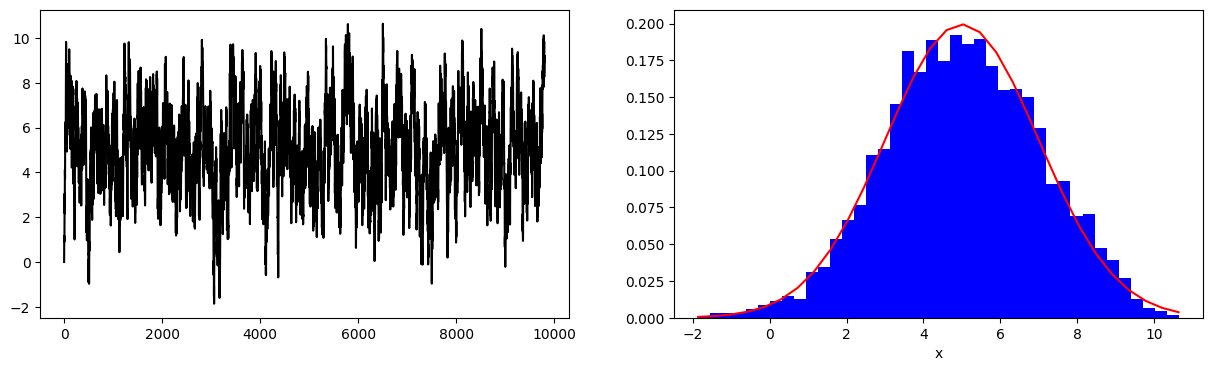

In [32]:
p0 = np.array([5,2])
x = Metropolis(Likelihood, p0, NSteps=int(1e4))

(array([  38.,  203.,  852., 1758., 2354., 2330., 1466.,  732.,  235.,
          32.]),
 array([-1.08347062,  0.13397027,  1.35141116,  2.56885204,  3.78629293,
         5.00373382,  6.2211747 ,  7.43861559,  8.65605648,  9.87349737,
        11.09093825]),
 <BarContainer object of 10 artists>)

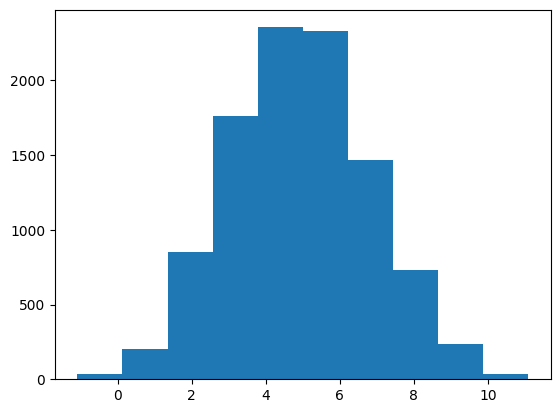

In [8]:
plt.hist(x)